<a href="https://colab.research.google.com/github/emmelinetsen/deep_learning/blob/master/homework_1/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
# batch size = 64
bs = 64

In [6]:
help(URLs)

Help on class URLs in module fastai.datasets:

class URLs(builtins.object)
 |  Global constants for dataset and model URLs.
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  ADULT_SAMPLE = 'http://files.fast.ai/data/examples/adult_sample'
 |  
 |  AG_NEWS = 'https://s3.amazonaws.com/fast-ai-nlp/ag_news_csv'
 |  
 |  AMAZON_REVIEWS = 'https://s3.amazonaws.com/fast-ai-nlp/amazon_review_f...
 |  
 |  AMAZON_REVIEWS_POLARITY = 'https://s3.amazonaws.com/fast-ai-nlp/amazon...
 |  
 |  BIWI_HEAD_POSE = 'https://s3.amazonaws.com/fast-ai-imagelocal/biwi_hea...
 |  
 |  BIWI_SAMPLE = 'http://files.fast.ai/data/examples/biwi_sample'
 |  
 |  CALTECH_101 = 'https://s3.amazonaws.com/fast-ai-imageclas/caltech_101'
 |  
 |  CAMVI

In [7]:
# getting the food dataset
path = untar_data(URLs.FOOD)
path

PosixPath('/root/.fastai/data/food-101')

In [8]:
path.ls()

[PosixPath('/root/.fastai/data/food-101/test.json'),
 PosixPath('/root/.fastai/data/food-101/images'),
 PosixPath('/root/.fastai/data/food-101/train.json')]

In [11]:
path_images = path/'images'
path_images.ls()

[PosixPath('/root/.fastai/data/food-101/images/sashimi'),
 PosixPath('/root/.fastai/data/food-101/images/frozen_yogurt'),
 PosixPath('/root/.fastai/data/food-101/images/baby_back_ribs'),
 PosixPath('/root/.fastai/data/food-101/images/pizza'),
 PosixPath('/root/.fastai/data/food-101/images/waffles'),
 PosixPath('/root/.fastai/data/food-101/images/garlic_bread'),
 PosixPath('/root/.fastai/data/food-101/images/hot_dog'),
 PosixPath('/root/.fastai/data/food-101/images/foie_gras'),
 PosixPath('/root/.fastai/data/food-101/images/bibimbap'),
 PosixPath('/root/.fastai/data/food-101/images/hummus'),
 PosixPath('/root/.fastai/data/food-101/images/clam_chowder'),
 PosixPath('/root/.fastai/data/food-101/images/takoyaki'),
 PosixPath('/root/.fastai/data/food-101/images/miso_soup'),
 PosixPath('/root/.fastai/data/food-101/images/shrimp_and_grits'),
 PosixPath('/root/.fastai/data/food-101/images/caesar_salad'),
 PosixPath('/root/.fastai/data/food-101/images/scallops'),
 PosixPath('/root/.fastai/data/

In [18]:
sashimi_files = path_images/'sashimi'
sashimi_files.ls()

[PosixPath('/root/.fastai/data/food-101/images/sashimi/3267126.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/2004566.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/1797545.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/251963.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/2995070.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/399449.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/3670207.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/603901.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/23524.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/3186769.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/815841.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/1372033.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/242717.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/2786663.jpg'),
 PosixPath('/root/.fastai/d

In [19]:
# get the file names for the sashimi images
sashimi_imgs = get_image_files(sashimi_files)
sashimi_imgs[:5]

[PosixPath('/root/.fastai/data/food-101/images/sashimi/3267126.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/2004566.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/1797545.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/251963.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/sashimi/2995070.jpg')]

In [20]:
# get the file names for the ceviche images
ceviche_imgs = get_image_files(path_images/'ceviche')
ceviche_imgs[:5]

[PosixPath('/root/.fastai/data/food-101/images/ceviche/81538.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/ceviche/1489794.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/ceviche/27823.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/ceviche/2330508.jpg'),
 PosixPath('/root/.fastai/data/food-101/images/ceviche/3484098.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [25]:
classes = ['sashimi', 'ceviche']
len(classes), classes

(2, ['sashimi', 'ceviche'])

In [36]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='images', ds_tfms=tfms, size=224)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


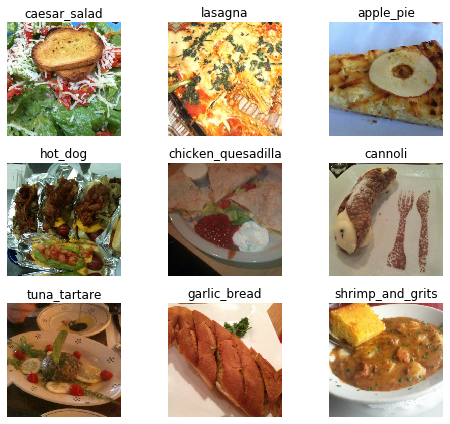

In [37]:
data.show_batch(rows=3, figsize=(7,6))

## resnet34

In [38]:
# building a resnet34 model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
# train 3 epochs - 3 cycles through all the data
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time


In [0]:
learn.save('stage-1')